<a href="https://colab.research.google.com/github/guimalucas/analise_hoteis/blob/main/analise_precos_hoteis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Predição de Preços de Hotéis
**Autor:** Lucas Guimarães
**Ferramentas:** Python, Pandas, Seaborn, Statsmodels, Plotly, Sklearn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
def carregar_dados(caminho):
    df = pd.read_csv(caminho)
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())
    return df

In [9]:
def analisar_dados(df):
    corr = df.corr()
    print("Correlação com Preço:\n", corr["Preco"])

In [10]:
def visualizar_dados(df):
    sns.pairplot(df, y_vars="Preco")
    sns.pairplot(df, x_vars="ProximidadeTurismo", y_vars="Preco", height=5)
    plt.xlabel("Distância do Turismo")
    plt.ylabel("Preço")
    px.scatter(df, x="ProximidadeTurismo", y="Preco", trendline="ols", trendline_color_override="red").show()

In [11]:
def treinar_modelo(x, y, variaveis):
    x = sm.add_constant(x)
    modelo = sm.OLS(y, x[["const"] + variaveis]).fit()
    print(modelo.summary())
    print("R²:", modelo.rsquared)
    return modelo

In [12]:
def avaliar_residuos(modelo):
    plt.hist(modelo.resid)
    plt.xlabel("Resíduos")
    plt.ylabel("Frequência")
    plt.title("Histograma dos Resíduos")
    plt.show()

In [13]:
def avaliar_modelo(modelo, x_test, y_test):
    x_test = sm.add_constant(x_test)
    pred = modelo.predict(x_test[modelo.params.index])
    print("R² de Teste:", r2_score(y_test, pred))
    return pred

In [14]:
def prever_novos_dados(modelo):
    novos_hoteis = pd.DataFrame({
        "Estrelas": [3, 5, 2, 4, 4, 3, 1, 5, 2, 4],
        "ProximidadeTurismo": [12.58, 2.34, 7.67, 10.23, 3.45, 15.33, 9.87, 4.12, 13.56, 6.78],
        "Capacidade": [2, 4, 3, 3, 1, 4, 2, 3, 3, 2]
    })
    novos_hoteis = sm.add_constant(novos_hoteis)
    pred = modelo.predict(novos_hoteis[modelo.params.index])
    print("Previsões para novos hotéis:\n", pred)

In [15]:
# Caminho do arquivo CSV
df = carregar_dados("hoteis.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB
None
          Estrelas  ProximidadeTurismo   Capacidade        Preco
count  1000.000000         1000.000000  1000.000000  1000.000000
mean      3.008000            7.650878     2.519000   396.611361
std       1.407095            5.870137     1.108543   171.742433
min       1.000000            0.013850     1.000000  -220.208705
25%       2.000000            3.034775     2.000000   283.590980
50%       3.000000            6.430035     3.000000   401.743527
75%       4.000000           10.863295     4.000000   516.097856
max       5.000000       

Correlação com Preço:
 Estrelas              0.401099
ProximidadeTurismo   -0.697142
Capacidade            0.531866
Preco                 1.000000
Name: Preco, dtype: float64


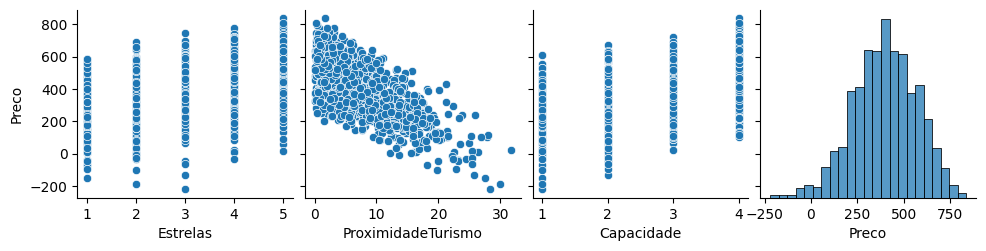

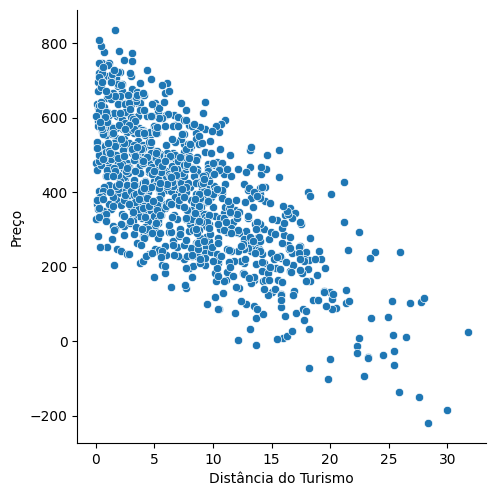

In [16]:
# Análise e visualização
analisar_dados(df)
visualizar_dados(df)

In [17]:
# Preparar dados para modelagem
x = df[['Estrelas', 'ProximidadeTurismo', 'Capacidade']]
y = df['Preco']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Treinar modelos
modelo1 = treinar_modelo(x_train, y_train, ["ProximidadeTurismo"])
modelo2 = treinar_modelo(x_train, y_train, ["Capacidade", "ProximidadeTurismo"])
modelo3 = treinar_modelo(x_train, y_train, ["Estrelas", "Capacidade", "ProximidadeTurismo"])

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     774.2
Date:                Mon, 05 May 2025   Prob (F-statistic):          1.26e-119
Time:                        21:20:45   Log-Likelihood:                -4978.7
No. Observations:                 800   AIC:                             9961.
Df Residuals:                     798   BIC:                             9971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                552.7057      7

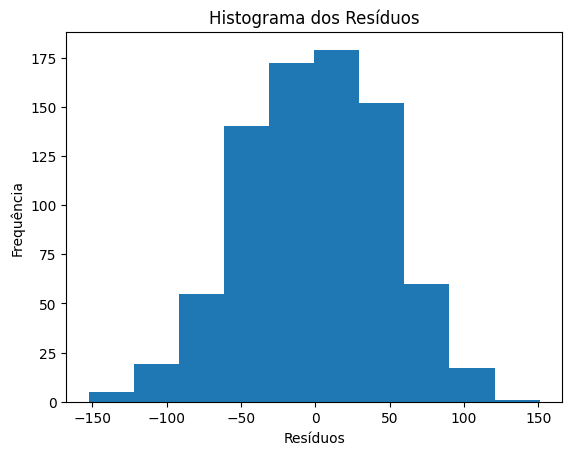

R² de Teste: 0.9244945040197874
Previsões para novos hotéis:
 0    255.465980
1    722.070383
2    383.765005
3    433.613794
4    406.722043
5    362.600395
6    208.603890
7    605.682926
8    266.487265
9    421.362599
dtype: float64


In [19]:
# Avaliação final
avaliar_residuos(modelo3)
avaliar_modelo(modelo3, x_test, y_test)
prever_novos_dados(modelo3)